# Full example of adaptive setpoint temperature simulation

In this section, we're going to run a simulation with adaptive setpoint temperatures. Say we want to run some simulations using a **Japanese local comfort model** developed by Hom Bahadur Rijal in some **locations in Japan**, and also we want to **analyse and visualize the data**. First of all, given EnergyPlus (any version between 9.1 and 23.1 included) is installed, and accim has been installed by entering 'pip install accim' in the CMD terminal, let's prepare the files we need: the IDF(s) and the EPW(s). Let's see what file we have in the folder and then we'll continue with the IDF(s).

In [1]:
from os import listdir
input_files = [i for i in listdir()]
print(*input_files, sep='\n')

.ipynb_checkpoints
backup
Current_Naha_JA-hour.epw
Current_Sapporo_JA-hour.epw
full_example.ipynb
Naha_JA-hour_ssp585_2080.epw
Sapporo_JA-hour_ssp585_2080.epw
TestModel.idf
__init__.py


## 1. IDF (using `addAccis()`)

Say we have one or multiple IDF files, with an existing HVAC system (in this case, the use of mixed-mode ScriptType 'ex_mm' is not recommended; only full air-conditioning) or with no HVAC system at all (in this case, any of the 'vrf_ac' or 'vrf_mm' ScriptTypes are recommended). In this example, we are going to use an IDF without HVAC system, and we are going to use 'vrf_mm' so that accim adds a generic VRF system.

Let's see what IDFs we do have in our folder:

In [2]:
input_idfs = [i for i in listdir() if i.endswith('.idf')]
print(input_idfs)

['TestModel.idf']


First, let's apply 24/7 (always on) schedules to occupancy, so that we have the HVAC system on all the hours of the year.

In [3]:
from accim.utils import set_occupancy_to_always_path
set_occupancy_to_always_path(idfpath='TestModel.idf')

On 24/7 Schedule:Compact object was already in the model.
People Block1:Zone2 Number of People Schedule Name has been set to always occupied.
People Block1:Zone1 Number of People Schedule Name has been set to always occupied.


So now, we're going to generate building energy models with setpoint temperatures based on the Japanese comfort model (i.e. ComfStand takes the value 3) and ASHRAE 55 (i.e. ComfStand takes the value 2). We're going to select the 80% acceptability levels for both (i.e. CAT takes the value 80), and we're going to select the setpoint behaviour to horizontally extend the setpoint temperatures (or comfort limits) when applicability limits are exceeded (i.e. ComfMod takes the value 3). There are 2 methods to apply adaptive setpoint temperatures:
- Short method, which is running the following to lines of code:
```
from accim.sim import accis
accis.addAccis()
```

When we run the 2 lines of code above, accim is going to ask us to enter some information it needs to generate the output IDFs. The data we're going to input, in the same order, is:
- Enter the ScriptType: **vrf_mm**
- Enter the SupplyAirTempInputMethod: **temperature difference**
- Do you want to keep the existing outputs (true or false)?: **false**
- Enter the Output type (standard, simplified or detailed): **standard**
- Enter the Output frequencies separated by space (timestep, hourly, daily, monthly, runperiod): **hourly monthly**
- Enter the EnergyPlus version (9.1 to 23.1): **23.1**
- Enter the Temperature Control method (temperature or pmv): **temperature**

After that, accim will let us know the information we have entered, and it will start the generic IDF generation process. Lots of actions are going to be performed, and all of them will be printed on screen. Once this process is done, accim will let us know if any of the IDFs is not going to work for any reason, and then it will start the output IDF files generation process. Then, accim will ask us again to enter some information, this time to generate the output IDF(s). The data we are going to enter now is:

- Enter the Comfort Standard numbers separated by space: **2 3**
- Enter the Category numbers separated by space: **80**
- Enter the Comfort Mode numbers separated by space: **0 3** (where 0 and 3 are respectively static and adaptive setpoints)
- Enter the HVAC Mode numbers separated by space: **1 2** (in this case we have also selected 1 for naturally ventilated, to see the difference with mixed-mode)
- Enter the Ventilation Control numbers separated by space: **0**

For all the remaining arguments, we're going to hit enter to omit it and take the default value. Finally, accim will let us know the list of output IDFs and will ask for confirmation to proceed:

- Do you still want to run ACCIS? [y/n]: **y**

Alternatively, we could specify all the arguments when calling the function, as shown in the cell below:

In [4]:
from accim.sim import accis
accis.addAccis(
    ScriptType='vrf_mm',
    SupplyAirTempInputMethod='temperature difference',
    Output_keep_existing=False,
    Output_type='standard',
    Output_freqs=['hourly', 'monthly'],
    EnergyPlus_version='23.1',
    TempCtrl='temperature',
    ComfStand=[2, 3],
    CAT=[80],
    ComfMod=[0, 3],
    HVACmode=[1, 2],
    VentCtrl=[0],
    VSToffset=[0],
    MinOToffset=[50],
    MaxWindSpeed=[50],
    ASTtol_steps=0.1,
    ASTtol_start=0.1,
    ASTtol_end_input=0.1,
    confirmGen=True
)


--------------------------------------------------------
Adaptive-Comfort-Control-Implemented Model (ACCIM) v0.7.3
--------------------------------------------------------

This tool allows to apply adaptive setpoint temperatures. 
For further information, please read the documentation: 
https://accim.readthedocs.io/en/master/
For a visual understanding of the tool, please visit the following jupyter notebooks:
-    Using addAccis() to apply adaptive setpoint temperatures
https://accim.readthedocs.io/en/master/jupyter_notebooks/addAccis/using_addAccis.html
-    Using rename_epw_files() to rename the EPWs for proper data analysis after simulation
https://accim.readthedocs.io/en/master/jupyter_notebooks/rename_epw_files/using_rename_epw_files.html
-    Using runEp() to directly run simulations with EnergyPlus
https://accim.readthedocs.io/en/master/jupyter_notebooks/runEp/using_runEp.html
-    Using the class Table() for data analysis
https://accim.readthedocs.io/en/master/jupyter_notebo

So, now let's see the list of output IDFs we have generated

In [5]:
output_idfs = [i for i in listdir() if i.endswith('.idf') and i not in input_idfs]
print(*output_idfs, sep='\n')

TestModel[CS_INT ASHRAE55[CA_80[CM_0[HM_1[VC_0[VO_0.0[MT_50.0[MW_50.0[AT_0.1[NS_X.idf
TestModel[CS_INT ASHRAE55[CA_80[CM_0[HM_2[VC_0[VO_0.0[MT_50.0[MW_50.0[AT_0.1[NS_X.idf
TestModel[CS_INT ASHRAE55[CA_80[CM_3[HM_1[VC_0[VO_0.0[MT_50.0[MW_50.0[AT_0.1[NS_X.idf
TestModel[CS_INT ASHRAE55[CA_80[CM_3[HM_2[VC_0[VO_0.0[MT_50.0[MW_50.0[AT_0.1[NS_X.idf
TestModel[CS_JPN Rijal[CA_80[CM_0[HM_1[VC_0[VO_0.0[MT_50.0[MW_50.0[AT_0.1[NS_X.idf
TestModel[CS_JPN Rijal[CA_80[CM_0[HM_2[VC_0[VO_0.0[MT_50.0[MW_50.0[AT_0.1[NS_X.idf
TestModel[CS_JPN Rijal[CA_80[CM_3[HM_1[VC_0[VO_0.0[MT_50.0[MW_50.0[AT_0.1[NS_X.idf
TestModel[CS_JPN Rijal[CA_80[CM_3[HM_2[VC_0[VO_0.0[MT_50.0[MW_50.0[AT_0.1[NS_X.idf


In this case, we have generated more IDFs than we need, so let's remove the others. We only want a single naturally ventilated IDF, to compare the indoor temperature with the mixed-mode IDF with adaptive setpoints. IDFs are NV when HVACmode takes the value 1.

In [6]:
idfs_to_be_removed = [i for i in listdir() if i.endswith('.idf') and 'HM_1' in i and 'ASHRAE55[CA_80[CM_3[HM_1' not in i]
print(*idfs_to_be_removed, sep='\n')

TestModel[CS_INT ASHRAE55[CA_80[CM_0[HM_1[VC_0[VO_0.0[MT_50.0[MW_50.0[AT_0.1[NS_X.idf
TestModel[CS_JPN Rijal[CA_80[CM_0[HM_1[VC_0[VO_0.0[MT_50.0[MW_50.0[AT_0.1[NS_X.idf
TestModel[CS_JPN Rijal[CA_80[CM_3[HM_1[VC_0[VO_0.0[MT_50.0[MW_50.0[AT_0.1[NS_X.idf


In [7]:
from os import remove
for i in idfs_to_be_removed:
    remove(i)

Let's see what IDFs we do finally have:

In [8]:
output_idfs = [i for i in listdir() if i.endswith('.idf') and i not in input_idfs]
print(*output_idfs, sep='\n')

TestModel[CS_INT ASHRAE55[CA_80[CM_0[HM_2[VC_0[VO_0.0[MT_50.0[MW_50.0[AT_0.1[NS_X.idf
TestModel[CS_INT ASHRAE55[CA_80[CM_3[HM_1[VC_0[VO_0.0[MT_50.0[MW_50.0[AT_0.1[NS_X.idf
TestModel[CS_INT ASHRAE55[CA_80[CM_3[HM_2[VC_0[VO_0.0[MT_50.0[MW_50.0[AT_0.1[NS_X.idf
TestModel[CS_JPN Rijal[CA_80[CM_0[HM_2[VC_0[VO_0.0[MT_50.0[MW_50.0[AT_0.1[NS_X.idf
TestModel[CS_JPN Rijal[CA_80[CM_3[HM_2[VC_0[VO_0.0[MT_50.0[MW_50.0[AT_0.1[NS_X.idf


So, we're done with the IDFs. You can see these have been named based on the input data, separated by the character '['. Let's move to the EPWs.

## 2. EPW (using `rename_epw_files()`)

Let's see the EPWs we are going to use for the simulations:

In [9]:
original_epws = [i for i in listdir() if i.endswith('.epw')]
print(*original_epws, sep='\n')

Current_Naha_JA-hour.epw
Current_Sapporo_JA-hour.epw
Naha_JA-hour_ssp585_2080.epw
Sapporo_JA-hour_ssp585_2080.epw


However, we don't want to run the simulations using that name. To ease the later data analysis, we are going to rename the EPW files following the pattern 'Country_City_RCPscenario-Year'. This way, data will be able to be grouped by country, city, RCP scenario and year. So let's rename them running the code in the cell below.

First, accim will try to rename them based on the original name and the geolocation. If no match between those is found, accim will assign the string 'UNKNOWN' to the city. Then, accim will ask you if you want to edit some of the new names. If so, you'll need to enter the IDs:
- If any of the city or subcountry names needs some amendment (if you are not happy with any of the available options, you can exclude it from renaming at the next stage), please enter the EPW IDs separated by space:**(hit enter)**

Afterwards, you'll be asked to enter the new city name for each ID you previously entered (in this case, 0 1 2 3). So, 
- Regarding the file ID: 0 ... Please enter the amended city or subcountry, which must be unique: **Naha**
- Regarding the file ID: 1 ... Please enter the amended city or subcountry, which must be unique: **Sapporo**
- Regarding the file ID: 2 ... Please enter the amended city or subcountry, which must be unique: **Naha**
- Regarding the file ID: 3 ... Please enter the amended city or subcountry, which must be unique: **Sapporo**

Then, accim will let you know the old names, and the new named after amendments. Next, accim will ask you if you want to exclude some EPW from renaming. In this case, we're just going to hit enter to continue because we don't want to exclude any:
- If you want to exclude some EPWs from renaming, please enter the new names separated by space, otherwise, hit enter to continue:

Finally, accim will ask for confirmation to proceed with the renaming:
Do you want to rename the file or files? [y/n]:**y**

At this point, accim will make a copy of the EPWs and rename them. Afterwards, we would be asked if we want to delete the older EPWs. In this case, we won't because the deletion has been already set to False in the arguments.

In [10]:
#from accim.data.data_preprocessing import rename_epw_files
#rename_epw_files(
    #rename_dict={
        #'Naha': 'Naha',
        #'Sapporo': 'Sapporo'
    #},
    #confirm_deletion=False
#)

``rename_epw_files`` uses OpenStreetMap to extract the address from coordinates. If you get an SSL certificate error, you might need to find a different way to rename the files. You could also proceed without renaming them, but you could only make comparisons based on the entire EPW filename. <span style="color:red">IMPORTANT: PLEASE, **ONLY** RUN THE NEXT CELL IF YOU GOT AN SSL ERROR IN THE PREVIOUS ONE:</span>

In [11]:
import os
import shutil

for i in original_epws:
    shutil.copy(i, i.split('.epw')[0]+'_new.epw')

renaming_epws = {
    'Current_Naha_JA-hour_new.epw': 'Japan_Naha_Present.epw',
    'Current_Sapporo_JA-hour_new.epw': 'Japan_Sapporo_Present.epw',
    'Naha_JA-hour_ssp585_2080_new.epw': 'Japan_Naha_SSP585-2080.epw',
    'Sapporo_JA-hour_ssp585_2080_new.epw': 'Japan_Sapporo_SSP585-2080.epw',
}

for i in renaming_epws:
    os.rename(i, renaming_epws[i])

Now, let's see what EPWs we do have:

In [12]:
all_epws = [i for i in listdir() if i.endswith('.epw')]
print(*all_epws, sep='\n')

Current_Naha_JA-hour.epw
Current_Sapporo_JA-hour.epw
Japan_Naha_Present.epw
Japan_Naha_SSP585-2080.epw
Japan_Sapporo_Present.epw
Japan_Sapporo_SSP585-2080.epw
Naha_JA-hour_ssp585_2080.epw
Sapporo_JA-hour_ssp585_2080.epw


We can see the new EPWs are:

In [13]:
new_epws = [i for i in listdir() if i.endswith('.epw') if i not in original_epws]
print(*new_epws, sep='\n')

Japan_Naha_Present.epw
Japan_Naha_SSP585-2080.epw
Japan_Sapporo_Present.epw
Japan_Sapporo_SSP585-2080.epw


EPWs are correctly renamed, so now let's move the old EPWs to a different folder to save them as a backup.

In [14]:
import shutil
for i in original_epws:
    shutil.move(i, f'backup/{i}')

Now, we can move to the next stage.

## 3. Running the simulation (using `runEp()`)

At this point, we have prepared the IDF(s) we are going to simulate, which are

In [15]:
print(*output_idfs, sep='\n')

TestModel[CS_INT ASHRAE55[CA_80[CM_0[HM_2[VC_0[VO_0.0[MT_50.0[MW_50.0[AT_0.1[NS_X.idf
TestModel[CS_INT ASHRAE55[CA_80[CM_3[HM_1[VC_0[VO_0.0[MT_50.0[MW_50.0[AT_0.1[NS_X.idf
TestModel[CS_INT ASHRAE55[CA_80[CM_3[HM_2[VC_0[VO_0.0[MT_50.0[MW_50.0[AT_0.1[NS_X.idf
TestModel[CS_JPN Rijal[CA_80[CM_0[HM_2[VC_0[VO_0.0[MT_50.0[MW_50.0[AT_0.1[NS_X.idf
TestModel[CS_JPN Rijal[CA_80[CM_3[HM_2[VC_0[VO_0.0[MT_50.0[MW_50.0[AT_0.1[NS_X.idf


as well as the locations where we are going to run those simulations, whose EPWs are:

In [16]:
print(*new_epws, sep='\n')

Japan_Naha_Present.epw
Japan_Naha_SSP585-2080.epw
Japan_Sapporo_Present.epw
Japan_Sapporo_SSP585-2080.epw


So, we are going to simulate all IDF(s) with all EPW(s). When we run later the simulations using accim, the output files (i.e. the CSVs) will be named following the pattern **'idf[epw'**, where the character '[' is used as a separator for later data analysis, so that CSV rows can be grouped by EPW location. You may have noticed the same character is used as a separator in the IDF name, in order to group the CSV rows depending on the input data.

To run the simulations, 2 methods can be used:
- the shorter, in which the following 2 lines of code needs to be run:
    ```
    from accim.run import run
    run.runEp()
    ```
   After this, you'll be asked to enter the EnergyPlus version (which should coincide with the IDF EnergyPlus version):
    - Please enter the desired EnergyPlus version: **23.1**
    
   Then, you will need to say if you want to run only output IDFs of accim, or otherwise all existing IDFs in the folder:
    - Do you want to run only ACCIM output IDFs? [y or n]: **y**
    
   Next, accim will tell you the IDF(s) and EPW(s) it's going to use for the simulations, and finally all the simulations it's going to run based on the name pattern 'idf[epw'.
   Finally, it will ask for confirmation to proceed with the simulation:
    - Do you still want to proceed? [y or n]:**y**
- the longer method, in which the parameters are specified when calling the function. We'll use the longer method, so let's run the cell below. Since there are a few simulations, it might take a few minutes.

In [17]:
from accim.run import run
run.runEp(
    runOnlyAccim=True, #only runs output IDFs, that is, IDFs with "[" in its name
    confirmRun=True, #to skip confirmation
    num_CPUs=4, #to specify the number of CPUs to be used
    EnergyPlus_version='23.1', #to specify the EnergyPlus version of the IDF, and the version of EnergyPlus you are going to run
)

IDD was already set.
The IDFs we are going to run are:
TestModel[CS_INT ASHRAE55[CA_80[CM_0[HM_2[VC_0[VO_0.0[MT_50.0[MW_50.0[AT_0.1[NS_X.idf
TestModel[CS_INT ASHRAE55[CA_80[CM_3[HM_1[VC_0[VO_0.0[MT_50.0[MW_50.0[AT_0.1[NS_X.idf
TestModel[CS_INT ASHRAE55[CA_80[CM_3[HM_2[VC_0[VO_0.0[MT_50.0[MW_50.0[AT_0.1[NS_X.idf
TestModel[CS_JPN Rijal[CA_80[CM_0[HM_2[VC_0[VO_0.0[MT_50.0[MW_50.0[AT_0.1[NS_X.idf
TestModel[CS_JPN Rijal[CA_80[CM_3[HM_2[VC_0[VO_0.0[MT_50.0[MW_50.0[AT_0.1[NS_X.idf
 and the No. of IDFs is going to be 5
The sample_EPWs we are going to run are:
Japan_Naha_Present.epw
Japan_Naha_SSP585-2080.epw
Japan_Sapporo_Present.epw
Japan_Sapporo_SSP585-2080.epw
 and the No. of sample_EPWs is going to be 4
Therefore, the simulations are going to be:
TestModel[CS_INT ASHRAE55[CA_80[CM_0[HM_2[VC_0[VO_0.0[MT_50.0[MW_50.0[AT_0.1[NS_X[Japan_Naha_Present
TestModel[CS_INT ASHRAE55[CA_80[CM_0[HM_2[VC_0[VO_0.0[MT_50.0[MW_50.0[AT_0.1[NS_X[Japan_Naha_SSP585-2080
TestModel[CS_INT ASHRAE55[CA_80[CM_0[HM_2

So simulations are done. Let's see the CSV data we have now:

In [18]:
csvs = [i for i in listdir() if i.endswith('.csv') and 'Zsz.csv' not in i and 'Table.csv' not in i]
print(*csvs, sep='\n')

TestModel[CS_INT ASHRAE55[CA_80[CM_0[HM_2[VC_0[VO_0.0[MT_50.0[MW_50.0[AT_0.1[NS_X[Japan_Naha_Present.csv
TestModel[CS_INT ASHRAE55[CA_80[CM_0[HM_2[VC_0[VO_0.0[MT_50.0[MW_50.0[AT_0.1[NS_X[Japan_Naha_SSP585-2080.csv
TestModel[CS_INT ASHRAE55[CA_80[CM_0[HM_2[VC_0[VO_0.0[MT_50.0[MW_50.0[AT_0.1[NS_X[Japan_Sapporo_Present.csv
TestModel[CS_INT ASHRAE55[CA_80[CM_0[HM_2[VC_0[VO_0.0[MT_50.0[MW_50.0[AT_0.1[NS_X[Japan_Sapporo_SSP585-2080.csv
TestModel[CS_INT ASHRAE55[CA_80[CM_3[HM_1[VC_0[VO_0.0[MT_50.0[MW_50.0[AT_0.1[NS_X[Japan_Naha_Present.csv
TestModel[CS_INT ASHRAE55[CA_80[CM_3[HM_1[VC_0[VO_0.0[MT_50.0[MW_50.0[AT_0.1[NS_X[Japan_Naha_SSP585-2080.csv
TestModel[CS_INT ASHRAE55[CA_80[CM_3[HM_1[VC_0[VO_0.0[MT_50.0[MW_50.0[AT_0.1[NS_X[Japan_Sapporo_Present.csv
TestModel[CS_INT ASHRAE55[CA_80[CM_3[HM_1[VC_0[VO_0.0[MT_50.0[MW_50.0[AT_0.1[NS_X[Japan_Sapporo_SSP585-2080.csv
TestModel[CS_INT ASHRAE55[CA_80[CM_3[HM_2[VC_0[VO_0.0[MT_50.0[MW_50.0[AT_0.1[NS_X[Japan_Naha_Present.csv
TestModel[CS_INT ASHRAE55[C

Now, we can move to the last stage, in which data will be analysed and visualized.

## 4. Analysing and visualising the data (using `Table()`)

In order to analyse and visualize the data, we need to make a pandas DataFrame out of the CSVs. We will do this by using the `Table()` method. To use this method, a minimum knowledge and experience with Python programming is needed, so if this is not your case, you may struggle to make it work.

Let's create an hourly dataframe, since firstly we are going to compare indoor temperature with and without adaptive setpoint temperatures.

In [19]:
from accim.data.postprocessing.main import Table
dataset_hourly = Table(
    #datasets=list #Since we are not specifying any list, it will use all available CSVs in the folder
    source_frequency='hourly', # This lets accim know which is the frequency of the input CSVs. Input CSVs with multiple frequencies are also allowed. It can be 'hourly', 'daily', 'monthly' and 'runperiod'. It can also be 'timestep' but might generate errors.
    frequency='hourly', # If 'daily', accim will aggregate the rows in days. It can be 'hourly', 'daily', 'monthly' and 'runperiod'. It can also be 'timestep' but might generate errors.
    frequency_agg_func='sum', #this makes the sum or average when aggregating in days, months or runperiod; since the original CSV frequency is in hour, it won't make any aeffect
    standard_outputs=True,
    idf_path='TestModel.idf',
    level=['building'], # A list containing the strings 'block' and/or 'building'. For instance, if ['block', 'building'], accim will generate new columns to sum up or average in blocks and building level.
    level_agg_func=['sum', 'mean'], # A list containing the strings 'sum' and/or 'mean'. For instance, if ['sum', 'mean'], accim will generate the new columns explained in the level argument by summing and averaging.
    level_excluded_zones=[],
    split_epw_names=True, #to split EPW names based on the pattern Country_City_RCPscenario-Year
)

Input data frequency in file TestModel[CS_INT ASHRAE55[CA_80[CM_0[HM_2[VC_0[VO_0.0[MT_50.0[MW_50.0[AT_0.1[NS_X[Japan_Naha_Present.csv is hourly, therefore no aggregation will be performed.
Input data frequency in file TestModel[CS_INT ASHRAE55[CA_80[CM_0[HM_2[VC_0[VO_0.0[MT_50.0[MW_50.0[AT_0.1[NS_X[Japan_Naha_SSP585-2080.csv is hourly, therefore no aggregation will be performed.
Input data frequency in file TestModel[CS_INT ASHRAE55[CA_80[CM_0[HM_2[VC_0[VO_0.0[MT_50.0[MW_50.0[AT_0.1[NS_X[Japan_Sapporo_Present.csv is hourly, therefore no aggregation will be performed.
Input data frequency in file TestModel[CS_INT ASHRAE55[CA_80[CM_0[HM_2[VC_0[VO_0.0[MT_50.0[MW_50.0[AT_0.1[NS_X[Japan_Sapporo_SSP585-2080.csv is hourly, therefore no aggregation will be performed.
Input data frequency in file TestModel[CS_INT ASHRAE55[CA_80[CM_3[HM_1[VC_0[VO_0.0[MT_50.0[MW_50.0[AT_0.1[NS_X[Japan_Naha_Present.csv is hourly, therefore no aggregation will be performed.
Input data frequency in file TestModel[CS

Let's filter the columns we are going to use:

In [20]:
dataset_hourly.format_table(
    type_of_table='custom', # Used to choose some predefined tables. It can be 'energy demand', 'comfort hours', 'temperature', 'all' or 'custom'
    custom_cols=[ #if type_of_table is 'custom', custom_cols is used to filter the desired columns to keep
        'Adaptive Cooling Setpoint Temperature_No Tolerance (°C)',
        'Adaptive Heating Setpoint Temperature_No Tolerance (°C)',
        'Building_Total_Zone Operative Temperature (°C) (mean)',
        'Block1:Zone2_ASHRAE 55 Running mean outdoor temperature (°C)',
        'Building_Total_Cooling Energy Demand (kWh/m2) (summed)',
        'Building_Total_Heating Energy Demand (kWh/m2) (summed)',
        'Building_Total_AFN Zone Infiltration Air Change Rate (ach) (summed)'
    ]
)

### 4.1 Visualizing the data 

And now, let's generate the figure data (a list of lists and dictionaries with all information to be plotted) with `generate_fig_data()` and afterwards, let's plot the figure with `scatter_plot()`.

The number of rows and the list of these is going to be:
No. of rows = 4
List of rows:
Japan_Naha_Present
Japan_Naha_SSP585-2080
Japan_Sapporo_Present
Japan_Sapporo_SSP585-2080
The renamed rows are going to be:
Naha Present
Naha SSP585-2080
Sapporo Present
Sapporo SSP585-2080
The number of columns and the list of these is going to be:
No. of columns = 2
List of columns:
CS_INT ASHRAE55[CM_3[HM_1
CS_INT ASHRAE55[CM_3[HM_2
The renamed columns are going to be:
ASHRAE 55 NV
ASHRAE 55 MM


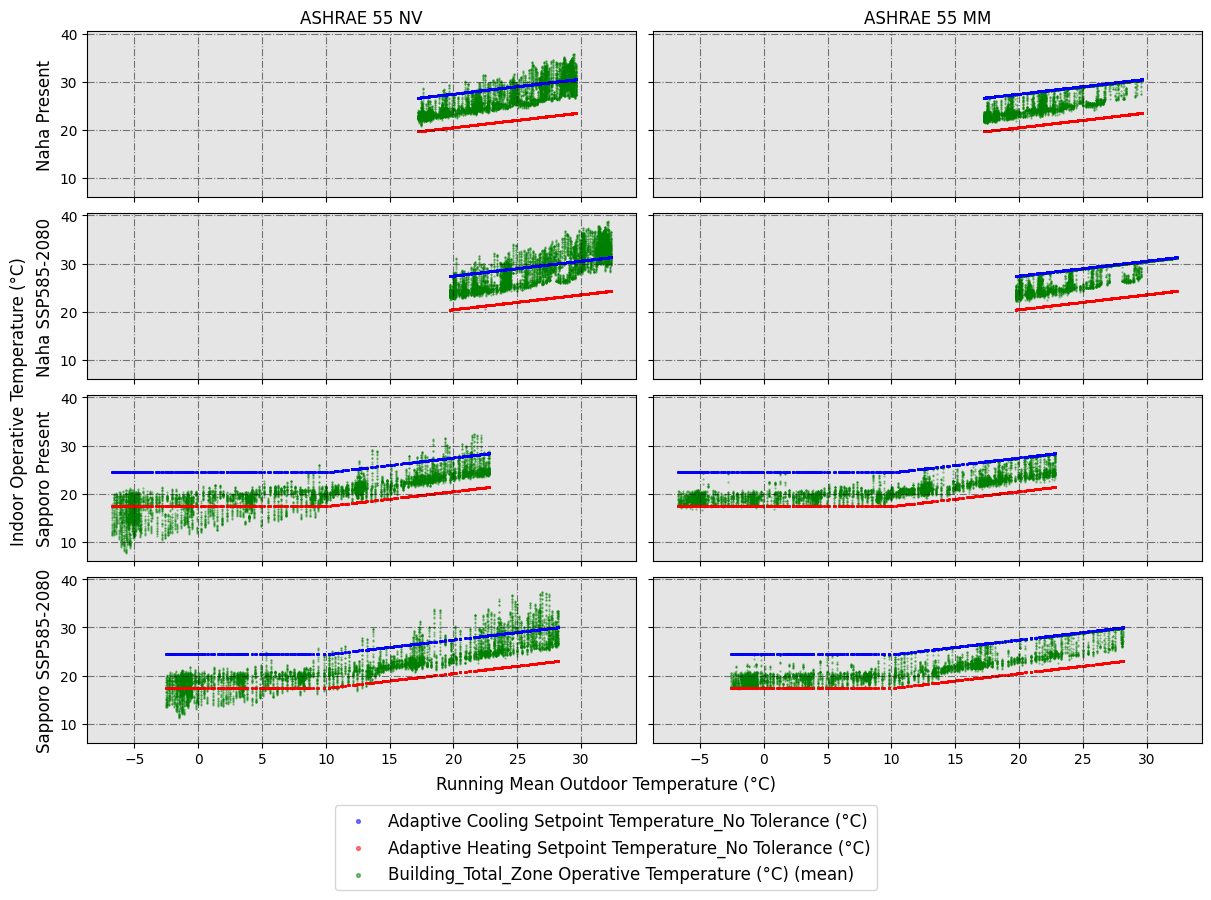

In [21]:

dataset_hourly.scatter_plot(
    vars_to_gather_rows=['EPW'], # variables to gather in rows of subplots
    vars_to_gather_cols=['ComfStand', 'ComfMod', 'HVACmode'],# variables to gather in columns of subplots; all categorical columns which have more than 1 different value across the rows, must be specified in this argument, otherwise you'll get an error.
    detailed_cols=['CS_INT ASHRAE55[CM_3[HM_1', 'CS_INT ASHRAE55[CM_3[HM_2'], # a list of the specific combinations of arguments to be plotted joined by [
    data_on_x_axis='Block1:Zone2_ASHRAE 55 Running mean outdoor temperature (°C)', #column name (string) for the data on x axis
    data_on_y_main_axis=[ #list which includes the name of the axis on the first place, and then in the second place, a list which includes the column names you want to plot
        [
            'Indoor Operative Temperature (°C)',
            [
                'Adaptive Cooling Setpoint Temperature_No Tolerance (°C)',
                'Adaptive Heating Setpoint Temperature_No Tolerance (°C)',
                'Building_Total_Zone Operative Temperature (°C) (mean)',
            ]
        ],
    ],
    colorlist_y_main_axis=[
        [
            'Indoor Operative Temperature (°C)',
            [
                'b',
                'r',
                'g',
            ]
        ],
    ],
    rows_renaming_dict={
        'Japan_Naha_Present': 'Naha Present',
        'Japan_Naha_SSP585-2080': 'Naha SSP585-2080',
        'Japan_Sapporo_Present': 'Sapporo Present',
        'Japan_Sapporo_SSP585-2080': 'Sapporo SSP585-2080',
    },
    cols_renaming_dict={
        'CS_INT ASHRAE55[CM_3[HM_1': 'ASHRAE 55 NV',
        'CS_INT ASHRAE55[CM_3[HM_2': 'ASHRAE 55 MM',
    },
    supxlabel='Running Mean Outdoor Temperature (°C)', # data label on x axis
    figname='Scatterplot_NV_vs_MM',
    figsize=6,
    ratio_height_to_width=0.33,
    confirm_graph=True
)

In this figure, you can see on the left column the simulations with free-running (or naturally ventilated) mode, while on the right, the same simulations using mixed-mode with adaptive setpoint temperatures, which introduce all hourly indoor temperatures within the adaptive thermal comfort limits.

Next, let's compare the indoor temperatures of ASHRAE 55, the local Japanese model and the static setpoints for Japan, and in this case, we're also going to plot the hourly energy demand on the secondary axis.

The number of rows and the list of these is going to be:
No. of rows = 4
List of rows:
Japan_Naha_Present
Japan_Naha_SSP585-2080
Japan_Sapporo_Present
Japan_Sapporo_SSP585-2080
The renamed rows are going to be:
Naha Present
Naha SSP585-2080
Sapporo Present
Sapporo SSP585-2080
The number of columns and the list of these is going to be:
No. of columns = 3
List of columns:
CS_JPN Rijal[CM_0[HM_2
CS_INT ASHRAE55[CM_3[HM_2
CS_JPN Rijal[CM_3[HM_2
The renamed columns are going to be:
JPN Stat MM
ASHRAE55 Adap MM
JPN Adap MM


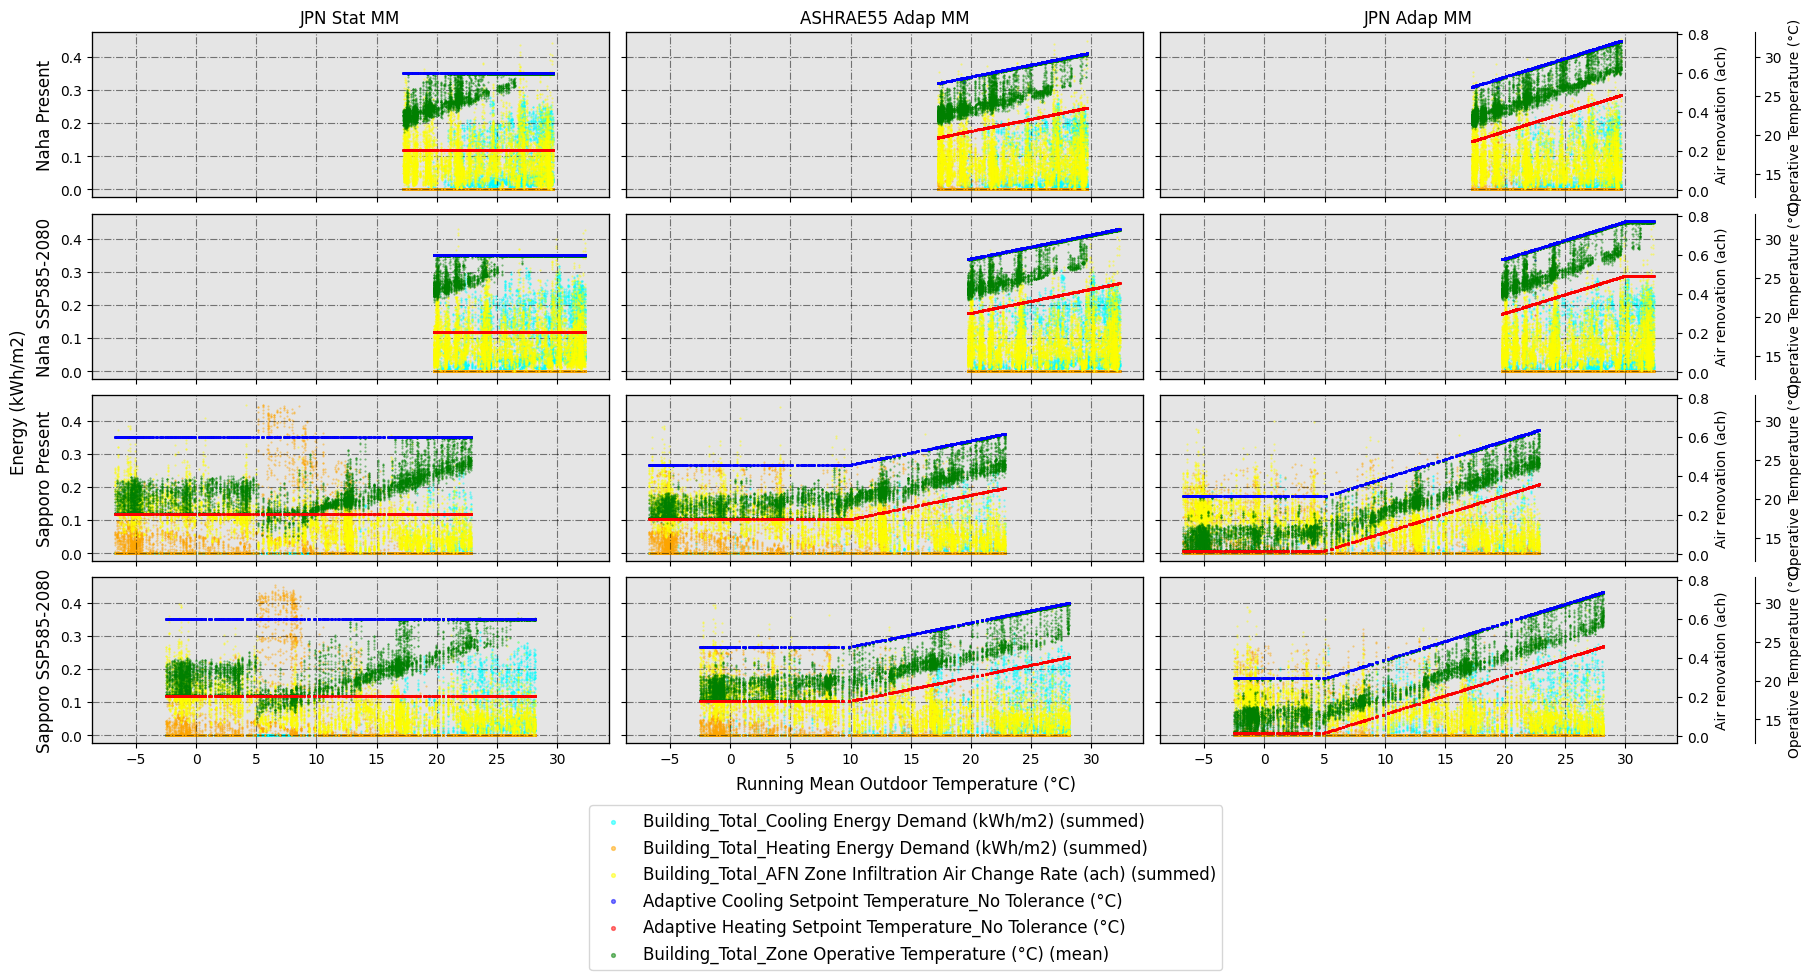

In [22]:
dataset_hourly.scatter_plot(
    vars_to_gather_cols=['ComfStand', 'ComfMod', 'HVACmode'], # variables to gather in rows of subplots
    vars_to_gather_rows=['EPW'],# variables to gather in columns of subplots
    detailed_cols=['CS_JPN Rijal[CM_0[HM_2', 'CS_INT ASHRAE55[CM_3[HM_2', 'CS_JPN Rijal[CM_3[HM_2'], #we only want to see those combinations
    #custom_cols_order=['CS_JPN Rijal[CM_0[HM_2', 'CS_INT ASHRAE55[CM_3[HM_2', 'CS_JPN Rijal[CM_3[HM_2'],
    data_on_x_axis='Block1:Zone2_ASHRAE 55 Running mean outdoor temperature (°C)', #column name (string) for the data on x axis
    data_on_y_sec_axis=[ #list which includes the name of the axis on the first place, and then in the second place, a list which includes the column names you want to plot
        [
            'Air renovation (ach)',
            [
                'Building_Total_AFN Zone Infiltration Air Change Rate (ach) (summed)'
            ]
        ],
        [
            'Operative Temperature (°C)',
            [
                'Adaptive Cooling Setpoint Temperature_No Tolerance (°C)',
                'Adaptive Heating Setpoint Temperature_No Tolerance (°C)',
                'Building_Total_Zone Operative Temperature (°C) (mean)',
            ]
        ],
    ],
    data_on_y_main_axis=[ # similarly to above, a list including the name of the secondary y-axis and the column names you want to plot in it
        [
            'Energy (kWh/m2)',
            [
                'Building_Total_Cooling Energy Demand (kWh/m2) (summed)',
                'Building_Total_Heating Energy Demand (kWh/m2) (summed)',
            ]
        ],

    ],
    colorlist_y_sec_axis=[
        [
            'Air renovation (ach)',
            [
                'yellow'
            ]
        ],
        [
            'Operative Temperature (°C)',
            [
                'b',
                'r',
                'g',
            ]
        ],
    ],
    colorlist_y_main_axis=[
        [
            'Energy (kWh/m2)',
            [
                'cyan',
                'orange',
            ]
        ],
    ],
    rows_renaming_dict={
        'Japan_Naha_Present': 'Naha Present',
        'Japan_Naha_SSP585-2080': 'Naha SSP585-2080',
        'Japan_Sapporo_Present': 'Sapporo Present',
        'Japan_Sapporo_SSP585-2080': 'Sapporo SSP585-2080',
    },
    cols_renaming_dict={
        'CS_JPN Rijal[CM_0[HM_2': 'JPN Stat MM',
        'CS_INT ASHRAE55[CM_3[HM_2': 'ASHRAE55 Adap MM',
        'CS_JPN Rijal[CM_3[HM_2': 'JPN Adap MM'
    },
    supxlabel='Running Mean Outdoor Temperature (°C)', # data label on x axis
    figname=f'scatterplot_JPN_stat_ASH_adap_JPN_adap',
    figsize=6,
    ratio_height_to_width=0.33,
    confirm_graph=True
)

### 4.2 Analysing the data

Now, let's see how many comfort hours were considering the NV mode, and afterwards the MM considering ASHRAE 55, as well as the impact on energy demand. Since we want to see the runperiod totals, we will need to make a new instance of Table(), asking for runperiod frequency this time.

In [23]:
from accim.data.postprocessing.main import Table
dataset_runperiod = Table(
    #datasets=list #Since we are not specifying any list, it will use all available CSVs in the folder
    source_frequency='hourly', # This lets accim know which is the frequency of the input CSVs. Input CSVs with multiple frequencies are also allowed. It can be 'hourly', 'daily', 'monthly' and 'runperiod'. It can also be 'timestep' but might generate errors.
    frequency='runperiod', # If 'daily', accim will aggregate the rows in days. It can be 'hourly', 'daily', 'monthly' and 'runperiod'. It can also be 'timestep' but might generate errors.
    frequency_agg_func='sum', #this makes the sum or average when aggregating in days, months or runperiod; since the original CSV frequency is in hour, it won't make any aeffect
    standard_outputs=True, 
    idf_path='TestModel.idf',
    level=['building'], # A list containing the strings 'block' and/or 'building'. For instance, if ['block', 'building'], accim will generate new columns to sum up or average in blocks and building level.
    level_agg_func=['sum', 'mean'], # A list containing the strings 'sum' and/or 'mean'. For instance, if ['sum', 'mean'], accim will generate the new columns explained in the level argument by summing and averaging.
    level_excluded_zones=[],
    #match_cities=bool #Only used when EPW file has NOT been previously renamed
    #manage_epw_names=bool #Only used when EPW file has NOT been previously renamed
    split_epw_names=True, #to split EPW names based on the pattern Country_City_RCPscenario-Year
)

dataset_runperiod.format_table(
    type_of_table='custom',
    custom_cols=[
        'Building_Total_Comfortable Hours_No Applicability (h) (mean)',
        'Building_Total_Total Energy Demand (kWh/m2) (summed)'
    ]
)

dataset_runperiod.wrangled_table(
    reshaping='unstack',
    vars_to_gather=['ComfStand', 'ComfMod', 'HVACmode'],
    baseline='CS_JPN Rijal[CM_3[HM_2',
    comparison_mode=['baseline compared to others'],
    comparison_cols=[],
    rename_dict={
        'CS_INT ASHRAE55[CM_0[HM_2': 'ASHRAE Stat MM',
        'CS_INT ASHRAE55[CM_3[HM_1': 'ASHRAE Adap NV',
        'CS_INT ASHRAE55[CM_3[HM_2': 'ASHRAE Adap MM',
        'CS_JPN Rijal[CM_0[HM_2': 'JPN Stat MM',
        'CS_JPN Rijal[CM_3[HM_2': 'JPN Adap MM',
    }
)

dataset_runperiod.wrangled_df_unstacked

No zones have been excluded from level computations.


Building_Total_Comfortable Hours_No Applicability (h) (mean)  \
                                                                                           ASHRAE Stat MM   
EPW_City_or_subcountry EPW_Scenario EPW_Year                                                                
Naha                   Present      Present                                             8731.04             
                       SSP585       2080                                                8733.92             
Sapporo                Present      Present                                             8433.38             
                       SSP585       2080                                                8537.58             

                                                                            \
                                             ASHRAE Adap NV ASHRAE Adap MM   
EPW_City_or_subcountry EPW_Scenario EPW_Year                                 
Naha                   Present      Present         7824.46        8732.46   
                       SSP585       2080            7027.96        8728.04   
Sapporo                Present      Present         7567.92        8618.29   
                       SSP585       2080            7604.33        8636.04   

                                                                      \
                                             JPN Stat MM JPN Adap MM   
EPW_City_or_subcountry EPW_Scenario EPW_Year                           
Naha                   Present      Present      8745.96     8733.88   
                       SSP585       2080         8746.04     8707.83   
Sapporo                Present      Present      8582.79     8626.92   
                       SSP585       2080         8563.08     8643.04   

                                             Building_Total_Total Energy Demand (kWh/m2) (summed)  \
                                                                                   ASHRAE Stat MM   
EPW_City_or_subcountry EPW_Scenario EPW_Year                                                        
Naha                   Present      Present                                              702.47     
                       SSP585       2080                                                 897.36     
Sapporo                Present      Present                                              664.36     
                       SSP585       2080                                                 659.86     

                                                                            \
                                             ASHRAE Adap NV ASHRAE Adap MM   
EPW_City_or_subcountry EPW_Scenario EPW_Year                                 
Naha                   Present      Present             0.0         376.74   
                       SSP585       2080                0.0         532.30   
Sapporo                Present      Present             0.0         327.95   
                       SSP585       2080                0.0         424.26   

                                                                      
                                             JPN Stat MM JPN Adap MM  
EPW_City_or_subcountry EPW_Scenario EPW_Year                          
Naha                   Present      Present       442.38      270.86  
                       SSP585       2080          668.81      468.19  
Sapporo                Present      Present       366.54      306.04  
                       SSP585       2080          512.97      398.52

The table above shows us the comfort hours in NV (CS_INT ASHRAE55[CM_3[HM_1) mode ranges between 5115.25 and 6945.50 hours, while the same comfort model in mixed-mode with adaptive setpoints (CS_INT ASHRAE55[CM_3[HM_2) ranges between 8598.15 and 8758.85. Since there is no HVAC system in NV mode, the energy consumption is 0. With adaptive setpoints, the hvac energy consumption ranges between 262.08 and 414.84 (kWh/m2·year).

Now, we could finally export this table to Excel format for later style edition. Since the reshaping argument we used in the `wrangled_table()` method was 'unstack', the dataframe we are looking for to be exported is `dataset_runperiod.wrangled_df_unstacked`. If we used the 'pivot' argument, the dataframe would have been `dataset_runperiod.wrangled_df_pivoted`. So let's export it:

In [24]:
dataset_runperiod.wrangled_df_unstacked.to_excel('df_unstacked.xlsx')

In [25]:
import pandas as pd

df = pd.read_excel('df_unstacked.xlsx', header=[0, 1], index_col=[0, 1, 2])
df

Building_Total_Comfortable Hours_No Applicability (h) (mean)  \
                                                                                           ASHRAE Stat MM   
EPW_City_or_subcountry EPW_Scenario EPW_Year                                                                
Naha                   Present      Present                                             8731.04             
                       SSP585       2080                                                8733.92             
Sapporo                Present      Present                                             8433.38             
                       SSP585       2080                                                8537.58             

                                                                            \
                                             ASHRAE Adap NV ASHRAE Adap MM   
EPW_City_or_subcountry EPW_Scenario EPW_Year                                 
Naha                   Present      Present         7824.46        8732.46   
                       SSP585       2080            7027.96        8728.04   
Sapporo                Present      Present         7567.92        8618.29   
                       SSP585       2080            7604.33        8636.04   

                                                                      \
                                             JPN Stat MM JPN Adap MM   
EPW_City_or_subcountry EPW_Scenario EPW_Year                           
Naha                   Present      Present      8745.96     8733.88   
                       SSP585       2080         8746.04     8707.83   
Sapporo                Present      Present      8582.79     8626.92   
                       SSP585       2080         8563.08     8643.04   

                                             Building_Total_Total Energy Demand (kWh/m2) (summed)  \
                                                                                   ASHRAE Stat MM   
EPW_City_or_subcountry EPW_Scenario EPW_Year                                                        
Naha                   Present      Present                                              702.47     
                       SSP585       2080                                                 897.36     
Sapporo                Present      Present                                              664.36     
                       SSP585       2080                                                 659.86     

                                                                            \
                                             ASHRAE Adap NV ASHRAE Adap MM   
EPW_City_or_subcountry EPW_Scenario EPW_Year                                 
Naha                   Present      Present               0         376.74   
                       SSP585       2080                  0         532.30   
Sapporo                Present      Present               0         327.95   
                       SSP585       2080                  0         424.26   

                                                                      
                                             JPN Stat MM JPN Adap MM  
EPW_City_or_subcountry EPW_Scenario EPW_Year                          
Naha                   Present      Present       442.38      270.86  
                       SSP585       2080          668.81      468.19  
Sapporo                Present      Present       366.54      306.04  
                       SSP585       2080          512.97      398.52

Finally, so that we can run this jupyter notebook again, let's leave everything as it was at the beginning.

In [26]:
for i in original_epws:
    shutil.move(f'backup/{i}', i)

In [27]:
files_to_delete = [i for i in listdir() if i not in input_files]
print(*files_to_delete, sep='\n')

df_unstacked.xlsx
Japan_Naha_Present.epw
Japan_Naha_SSP585-2080.epw
Japan_Sapporo_Present.epw
Japan_Sapporo_SSP585-2080.epw
scatterplot_JPN_stat_ASH_adap_JPN_adap.png
Scatterplot_NV_vs_MM.png
TestModel[CS_INT ASHRAE55[CA_80[CM_0[HM_2[VC_0[VO_0.0[MT_50.0[MW_50.0[AT_0.1[NS_X.idf
TestModel[CS_INT ASHRAE55[CA_80[CM_0[HM_2[VC_0[VO_0.0[MT_50.0[MW_50.0[AT_0.1[NS_X[Japan_Naha_Present.audit
TestModel[CS_INT ASHRAE55[CA_80[CM_0[HM_2[VC_0[VO_0.0[MT_50.0[MW_50.0[AT_0.1[NS_X[Japan_Naha_Present.bnd
TestModel[CS_INT ASHRAE55[CA_80[CM_0[HM_2[VC_0[VO_0.0[MT_50.0[MW_50.0[AT_0.1[NS_X[Japan_Naha_Present.csv
TestModel[CS_INT ASHRAE55[CA_80[CM_0[HM_2[VC_0[VO_0.0[MT_50.0[MW_50.0[AT_0.1[NS_X[Japan_Naha_Present.dxf
TestModel[CS_INT ASHRAE55[CA_80[CM_0[HM_2[VC_0[VO_0.0[MT_50.0[MW_50.0[AT_0.1[NS_X[Japan_Naha_Present.eio
TestModel[CS_INT ASHRAE55[CA_80[CM_0[HM_2[VC_0[VO_0.0[MT_50.0[MW_50.0[AT_0.1[NS_X[Japan_Naha_Present.end
TestModel[CS_INT ASHRAE55[CA_80[CM_0[HM_2[VC_0[VO_0.0[MT_50.0[MW_50.0[AT_0.1[NS_X[Japan_Na

In [28]:
for i in files_to_delete:
    remove(i)